[Original notepad for this lecture](http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston

# Load the housing dataset
boston = load_boston()
#Let's see what the data set contains
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

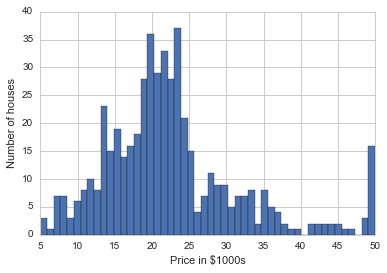

In [2]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

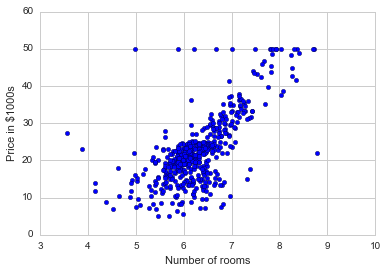

In [3]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

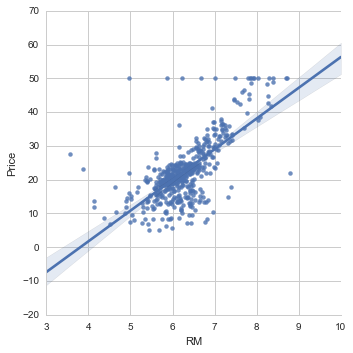

In [4]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

#show This prints dataset without columns headers
#boston_df.head()

# label columns
boston_df.columns = boston.feature_names

#show without price column
#boston_df.head()

# Set price column for target
boston_df['Price'] = boston.target
#Now let's see the resultign DataFrame!

# Show result
boston_df.head()

# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

Previous result done by seaborn 

Let's do the same with numpy code

Note: np.vstack tranform 

    0      6.575
    1      6.421
    2      7.185
    3      6.998
    4      7.147
    5      6.430
    ...

to:

    array([[ 6.575],
           [ 6.421],
           [ 7.185],
           [ 6.998],
           [ 7.147],
           [ 6.43 ],
           ...])

And 

    # Create the X array in the form [X 1]
    X = np.array( [ [value,1] for value in X ] )

Create 

    array([[array([ 6.575]), 1],
           [array([ 6.421]), 1],
           [array([ 7.185]), 1],
           ..., 
           [array([ 6.976]), 1],
           [array([ 6.794]), 1],
           [array([ 6.03]), 1]], dtype=object)

This is form of array required by np.linalg.lstsq

    # Now get out m and b values for our best fit line
    m, b = np.linalg.lstsq(X, Y)[0]
    
Google `np.linalg.lstsq` and pick numpy doc from results to read about __least square__ function    


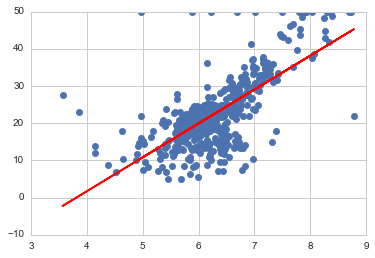

In [5]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [6]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)


The root mean squared error was 6.60 


In [12]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression
# Create a LinearRegression Object
lreg = LinearRegression()
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price
# X_multi
#Y_target
# Implement Linear Regression
lreg.fit(X_multi,Y_target)
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [13]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [14]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

#Let's go ahead and see what the output of the train_test_split was:

# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [15]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)
#Output:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#Now run a prediction on both the X training set and the testing set.
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

#Now we will get the mean square error

print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))

print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))


Fit a model X_train, and calculate MSE with Y_train: 41.68
Fit a model X_train, and calculate MSE with X_test and Y_test: 49.55


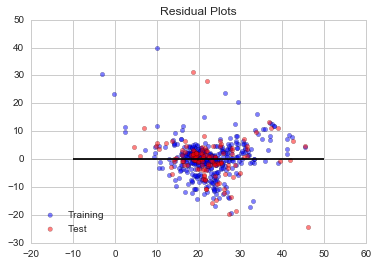

In [16]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

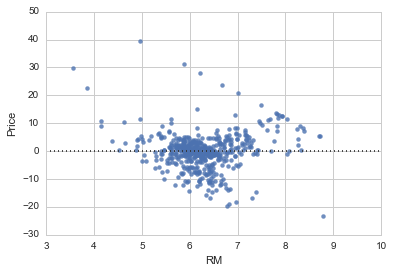

In [17]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)